# Implementation with Tensorflow

TensorFlow is an open-source software library for dataflow programming across a range of tasks. It is a symbolic math library, and is also used for machine learning applications such as neural networks.

Unlike `sklearn.neural_network`, tensorflow give us more freedom to set up our neural-network.

The following implementation was taken directly from https://www.tensorflow.org/tutorials/keras/basic_classification

First of all, let's try to import tensorflow and keras (which is now also part of tensorflow)

## Importing Tensorflow and Keras

In [86]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

## Explore the dataset

We will try to perform classification task on mnist's dataset (http://yann.lecun.com/exdb/mnist/). The dataset contains of `70000` gray-scale images. Each image has `28 x 28` dimension and belong to one (and only one) of the following 10 classes:

In [87]:
class_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

Now, let's download `fashion_mnist` dataset from `keras.datasets` and split them into `train` and `test` set. By default, the dataset contains of `60000` training set and `10000` test set.

In [88]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


Let's explore the data a little bit

Here is a bit information about our `train_labels`. It is a one-dimension array with 60000 elements

In [89]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [90]:
train_labels.shape

(60000,)

Now, let's explore our `train_images`

In [91]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [92]:
train_images.shape

(60000, 28, 28)

Just to make sure, let's see our first image and label in detail

label:  5
which is:  five


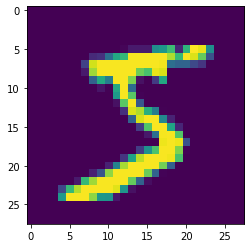

In [93]:
index = 0
label = train_labels[index]
image = train_images[index]

print("label: ", label) # this is the first train_labels
print("which is: ", class_names[label]) # use our pre-defined class_names to get textual representation of the label
plt.figure()
plt.imshow(image) # if you just want to see the matrix representation of the image, use `image` instead
plt.show()


## Configuring the neural network model

Finally, let's build our neural network.

First of all, we define 3 layers here:

* flatten layer with input_shape = 28x28: This one will transform our 2 dimensional matrix into 1 dimensional matrix (or a vector). The output of this layer will be an array with 784 elements
* dense layer containing 128 neuron with relu activation: This one will create a layer containing 128 neuron. Each of them is connected to the output of our previous layer (an array containing 784 elements). Each neuron activation is depending on `relu` function (https://en.wikipedia.org/wiki/Rectifier_(neural_networks)
* dense layer containing 10 neuron with softmax activation: Finally, since we have 10 classes, it is natural to have 10 neuron in our output layer. Each neuron should show us how probable is an image belong to a particular class. Finally, we will use softmax to return the prediction result (https://en.wikipedia.org/wiki/Softmax_function)

After defining the layers, we need to define our optimizer, loss function, and metrics:

* optimizer: How to optimize
* loss function: How to calculate error
* metrics: How to measure the quality of the network

In [94]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



## Train the neural network model

In [95]:
model.fit(train_images, train_labels, epochs=100)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 94us/sample - loss: 9.4768 - accuracy: 0.4109
Epoch 2/100
60000/60000 [==============================] - 5s 90us/sample - loss: 8.0383 - accuracy: 0.5005
Epoch 3/100
60000/60000 [==============================] - 5s 90us/sample - loss: 7.2688 - accuracy: 0.5484
Epoch 4/100
60000/60000 [==============================] - 5s 90us/sample - loss: 7.1353 - accuracy: 0.5569
Epoch 5/100
60000/60000 [==============================] - 5s 90us/sample - loss: 6.9730 - accuracy: 0.5669
Epoch 6/100
60000/60000 [==============================] - 5s 91us/sample - loss: 6.9570 - accuracy: 0.5681
Epoch 7/100
60000/60000 [==============================] - 5s 90us/sample - loss: 6.6057 - accuracy: 0.5896
Epoch 8/100
60000/60000 [==============================] - 5s 91us/sample - loss: 6.1260 - accuracy: 0.6193
Epoch 9/100
60000/60000 [==============================] - 5s 90us/sample - loss: 5.8815 - accuracy: 0.6345
Epoch

60000/60000 [==============================] - 5s 90us/sample - loss: 4.0528 - accuracy: 0.7485
Epoch 77/100
60000/60000 [==============================] - 5s 90us/sample - loss: 3.9462 - accuracy: 0.7551
Epoch 78/100
60000/60000 [==============================] - 5s 91us/sample - loss: 3.8967 - accuracy: 0.7581
Epoch 79/100
60000/60000 [==============================] - 5s 90us/sample - loss: 4.0119 - accuracy: 0.7510
Epoch 80/100
60000/60000 [==============================] - 5s 91us/sample - loss: 3.8886 - accuracy: 0.7587
Epoch 81/100
60000/60000 [==============================] - 5s 91us/sample - loss: 3.8775 - accuracy: 0.7594
Epoch 82/100
60000/60000 [==============================] - 5s 86us/sample - loss: 3.7995 - accuracy: 0.7642
Epoch 83/100
60000/60000 [==============================] - 5s 87us/sample - loss: 3.7972 - accuracy: 0.7643
Epoch 84/100
60000/60000 [==============================] - 5s 86us/sample - loss: 3.9107 - accuracy: 0.7572
Epoch 85/100
60000/60000 [======

## Prediction

target label:  7 seven
prediction label:  7 seven


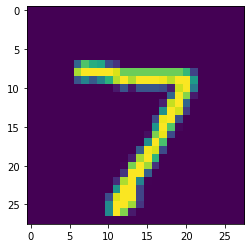

In [96]:
predictions = model.predict(test_images)
np.argmax(predictions[0])

index = 0
prediction_label = np.argmax(predictions[0])
target_label = test_labels[index]
image = test_images[index]

print("target label: ", target_label, class_names[target_label])
print("prediction label: ", prediction_label, class_names[prediction_label])
plt.figure()
plt.imshow(image) # if you just want to see the matrix representation of the image, use `image` instead
plt.show()
